In [76]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from dateutil.parser import parse

In [241]:
# 시각화할 때 한글표시하기 위한 작업.
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams[ 'axes.unicode_minus' ] = False

%matplotlib inline

if platform.system() == 'Darwin':
    rc( 'font', family = 'AppleGothic' )
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/gulim.ttc'
    font_name = font_manager.FontProperties( fname = path ).get_name()
    rc( 'font', family = font_name )
else:
    prit( 'Unknown system...' )

# 2019년 6월 렌트카 통화량 데이터 분석

In [183]:
rent = pd.read_csv('CALL_RENT_06MONTH.csv')
rent.index = rent['일자']
del rent['일자']
rent.head()

,요일,성별,연령,발신지_시도,발신지_구,발신지_동,통화건수
일자,,,,,,,
20190601,토,남,50대,세종특별자치시,.,부강면,5
20190601,토,남,20대,경기도,가평군,가평읍,5
20190601,토,여,60대이상,경기도,가평군,청평면,5
20190601,토,남,60대이상,서울특별시,강남구,역삼동,5
20190601,토,남,50대,서울특별시,강남구,논현동,5


In [246]:
df = rent
df = df[df['연령']!='10대']

In [247]:
count_df = pd.DataFrame(df.groupby(df.index)['통화건수'].count())
count_df.head()

,통화건수
일자,
20190601,1588
20190602,1257
20190603,2230
20190604,2155
20190605,2283


In [248]:
count_df.tail()

,통화건수
일자,
20190626,2060
20190627,2015
20190628,2095
20190629,1501
20190630,1185


In [249]:
count_df.index = pd.date_range(start='2019-06-01', periods=30)
count_df

,통화건수
2019-06-01,1588
2019-06-02,1257
2019-06-03,2230
2019-06-04,2155
2019-06-05,2283
2019-06-06,1608
2019-06-07,2113
2019-06-08,1647
2019-06-09,1148
2019-06-10,2132


Text(0.5, 1.0, '2019년 6월 한달 간, 렌트카를 대상으로 한 통화량 분석')

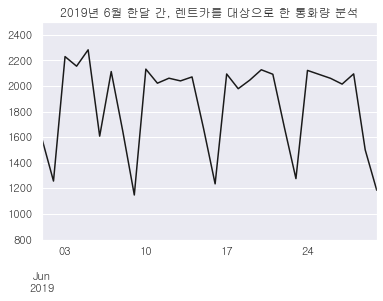

In [250]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx = count_df['통화건수']
spx.plot(ax = ax, style = 'k-')
    
# x, y좌표값 범위
ax.set_xlim([ '2019-06-01', '2019-06-30'])
ax.set_ylim([ 800, 2500])

# title
ax.set_title('2019년 6월 한달 간, 렌트카를 대상으로 한 통화량 분석')


In [251]:
df.describe()

,통화건수
count,55616.000000
mean,5.360076
std,3.024498
min,5.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,140.000000


In [252]:
week = pd.DataFrame(df.groupby('요일')['통화건수'].count())
week

,통화건수
요일,
금,8371
목,7790
수,8450
월,8578
일,6101
토,8079
화,8247


In [253]:
weeks = pd.DataFrame({'통화건수':
                      [week.통화건수[3], week.통화건수[6],
                       week.통화건수[2], week.통화건수[1],
                       week.통화건수[0], week.통화건수[5],
                       week.통화건수[4]]},
                       index = ['월', '화', '수', '목', '금', '토', '일'])
weeks

,통화건수
월,8578
화,8247
수,8450
목,7790
금,8371
토,8079
일,6101


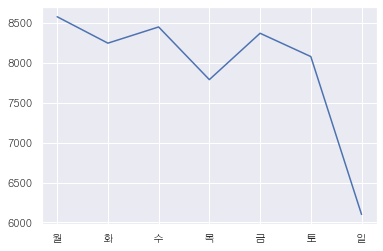

In [254]:
plt.plot(weeks)

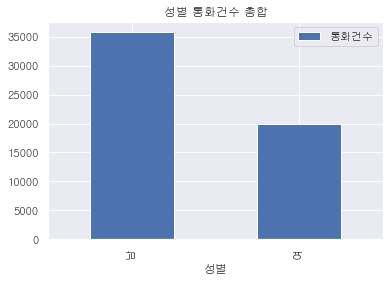

In [255]:
gender = pd.DataFrame(df.groupby('성별')['통화건수'].count())
gender.plot.bar(title = '성별 통화건수 총합')

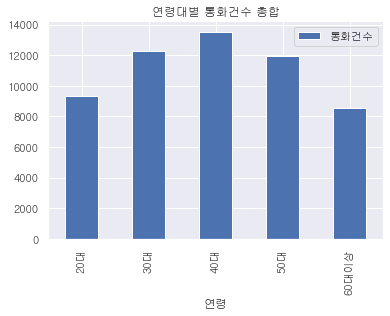

In [256]:
age = pd.DataFrame(df.groupby('연령')['통화건수'].count())
age.plot.bar(title = '연령대별 통화건수 총합')

In [257]:
gender_age = pd.DataFrame(df.groupby(('연령','성별'))['통화건수'].count())
gender_age = gender_age.sort_values(by = '통화건수', ascending=False)
gender_age

C:\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,,통화건수
연령,성별,
40대,남,8389
50대,남,7898
30대,남,7517
20대,남,6156
60대이상,남,5817
40대,여,5142
30대,여,4749
50대,여,4053
20대,여,3178


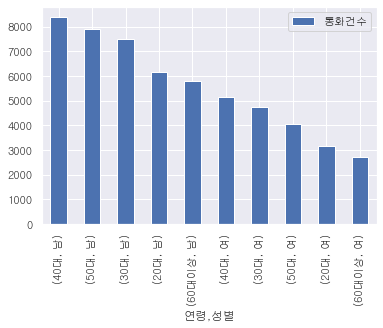

In [258]:
gender_age.plot.bar()

# 2019년 6월 대전 콜택시 이용 통화량 분석

In [260]:
taxi = pd.read_csv('CALL_TAXI2_TJ_06MONTH.csv')
taxi.head()

,기준년월일,요일,시간대,발신지_시도,발신지_시군구,발신지_읍면동,통화건수
0,20190601,토,0,대전광역시,동구,판암동,5
1,20190601,토,0,대전광역시,동구,용전동,8
2,20190601,토,0,대전광역시,서구,갈마동,5
3,20190601,토,0,대전광역시,서구,가수원동,5
4,20190601,토,0,대전광역시,서구,탄방동,18


In [263]:
taxi.describe()

,기준년월일,시간대,통화건수
count,9.414000e+03,9414.000000,9414.000000
mean,2.019062e+07,11.997982,8.223284
std,8.662725e+00,6.404451,6.039625
min,2.019060e+07,0.000000,5.000000
25%,2.019061e+07,7.000000,5.000000
50%,2.019062e+07,12.000000,5.000000
75%,2.019062e+07,17.000000,9.000000
max,2.019063e+07,23.000000,52.000000
